<a href="https://colab.research.google.com/github/negilbabu/Customer-Purchase-Prediction-ML-/blob/dev/Customer_Purchase_Prediction(ML).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Set up Git Repo

In [1]:
!apt-get update
!apt-get install git

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:2 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:4 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Hit:5 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:6 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ Packages [62.5 kB]
Get:7 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:8 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [1,234 kB]
Hit:9 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:11 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:12 https://r2u.stat.illinois.edu/ubuntu jammy/main all Packages [8,602 kB]
Get:13 http://archive.ubuntu.com/ubuntu 

In [2]:
!git clone https://github.com/negilbabu/Customer-Purchase-Prediction-ML-.git

Cloning into 'Customer-Purchase-Prediction-ML-'...
remote: Enumerating objects: 29, done.
remote: Counting objects: 100% (29/29), done.
remote: Compressing objects: 100% (27/27), done.
remote: Total 29 (delta 10), reused 7 (delta 1), pack-reused 0 (from 0)
Receiving objects: 100% (29/29), 897.11 KiB | 3.00 MiB/s, done.
Resolving deltas: 100% (10/10), done.


In [3]:
%cd Customer-Purchase-Prediction-ML-/

/content/Customer-Purchase-Prediction-ML-


In [4]:
!git checkout dev

Branch 'dev' set up to track remote branch 'dev' from 'origin'.
Switched to a new branch 'dev'


In [5]:
!git status

On branch dev
Your branch is up to date with 'origin/dev'.

nothing to commit, working tree clean


Set Up Kaggle

In [ ]:
# ! pip install -q kaggle
# from google.colab import files
# files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle (1).json': b'{"username":"negskaggle","key":"1a17f3b8301c1c5fb030b61f1eea0db4"}'}

In [6]:
# !mkdir -p ~/.kaggle?

In [ ]:
# ! cp kaggle.json ~/.kaggle/
# ! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# !kaggle datasets list -s "predict-customer-purchase-behavior-dataset"

ref                                                                 title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
------------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
rabieelkharoua/predict-customer-purchase-behavior-dataset           🛍️ Predict Customer Purchase Behavior Dataset        35KB  2024-06-19 02:48:24           3624         60  1.0              
rajeshrampure/black-friday-sale                                     Black Friday Sale                                     5MB  2022-12-24 09:37:49           8923         94  1.0              
fahmidachowdhury/customer-segmentation-data-for-marketing-analysis  Customer Segmentation Data for Marketing Analysis    16KB  2024-06-28 15:58:29           3990         62  0.9411765        
rabieelkharoua/predict-conversion-in-dig

In [ ]:
# !kaggle datasets download -d rabieelkharoua/predict-customer-purchase-behavior-dataset

Dataset URL: https://www.kaggle.com/datasets/rabieelkharoua/predict-customer-purchase-behavior-dataset
License(s): Attribution 4.0 International (CC BY 4.0)
predict-customer-purchase-behavior-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
# !unzip predict-customer-purchase-behavior-dataset.zip

Archive:  predict-customer-purchase-behavior-dataset.zip
replace customer_purchase_data.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: customer_purchase_data.csv  


Importing necessory Libraries

In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score , confusion_matrix , classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [8]:
df = pd.read_csv("/content/Customer-Purchase-Prediction-ML-/customer_purchase_data.csv")

In [9]:
print(df)

      Age  Gender   AnnualIncome  NumberOfPurchases  ProductCategory  \
0      40       1   66120.267939                  8                0   
1      20       1   23579.773583                  4                2   
2      27       1  127821.306432                 11                2   
3      24       1  137798.623120                 19                3   
4      31       1   99300.964220                 19                1   
...   ...     ...            ...                ...              ...   
1495   39       1   65048.141834                 13                0   
1496   67       1   28775.331069                 18                2   
1497   40       1   57363.247541                  7                4   
1498   63       0  134021.775532                 16                2   
1499   50       0   52625.665974                 13                0   

      TimeSpentOnWebsite  LoyaltyProgram  DiscountsAvailed  PurchaseStatus  
0              30.568601               0                 5

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 1500 non-null   int64  
 1   Gender              1500 non-null   int64  
 2   AnnualIncome        1500 non-null   float64
 3   NumberOfPurchases   1500 non-null   int64  
 4   ProductCategory     1500 non-null   int64  
 5   TimeSpentOnWebsite  1500 non-null   float64
 6   LoyaltyProgram      1500 non-null   int64  
 7   DiscountsAvailed    1500 non-null   int64  
 8   PurchaseStatus      1500 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 105.6 KB


In [11]:
df.describe()

,Age,Gender,AnnualIncome,NumberOfPurchases,ProductCategory,TimeSpentOnWebsite,LoyaltyProgram,DiscountsAvailed,PurchaseStatus
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.00000
mean,44.298667,0.504667,84249.164338,10.420000,2.012667,30.469040,0.326667,2.555333,0.43200
std,15.537259,0.500145,37629.493078,5.887391,1.428005,16.984392,0.469151,1.705152,0.49552
min,18.000000,0.000000,20001.512518,0.000000,0.000000,1.037023,0.000000,0.000000,0.00000
25%,31.000000,0.000000,53028.979155,5.000000,1.000000,16.156700,0.000000,1.000000,0.00000
50%,45.000000,1.000000,83699.581476,11.000000,2.000000,30.939516,0.000000,3.000000,0.00000
75%,57.000000,1.000000,117167.772858,15.000000,3.000000,44.369863,1.000000,4.000000,1.00000
max,70.000000,1.000000,149785.176481,20.000000,4.000000,59.991105,1.000000,5.000000,1.00000


In [12]:
df.head()

,Age,Gender,AnnualIncome,NumberOfPurchases,ProductCategory,TimeSpentOnWebsite,LoyaltyProgram,DiscountsAvailed,PurchaseStatus
0,40,1,66120.267939,8,0,30.568601,0,5,1
1,20,1,23579.773583,4,2,38.240097,0,5,0
2,27,1,127821.306432,11,2,31.633212,1,0,1
3,24,1,137798.623120,19,3,46.167059,0,4,1
4,31,1,99300.964220,19,1,19.823592,0,0,1


In [13]:
df.shape

(1500, 9)

Trim whitespaces from column name

In [14]:
df.columns = df.columns.str.strip()

Checking for any null values

In [15]:
print("Checking if there are any null values in any of the attributes",df.isnull().sum())

Checking if there are any null values in any of the attributes Age                   0
Gender                0
AnnualIncome          0
NumberOfPurchases     0
ProductCategory       0
TimeSpentOnWebsite    0
LoyaltyProgram        0
DiscountsAvailed      0
PurchaseStatus        0
dtype: int64


Checking for any Duplication

In [27]:
print("Checking if there are any duplicated entries\nDuplicated rows: ", df.duplicated().sum())

Checking if there are any duplicated entries
Duplicated rows:  112


In [28]:
df_removed_duplicates = df.drop_duplicates()
print("Total rows after removing duplicates", df_removed_duplicates.shape)

Total rows after removing duplicates (1388, 9)


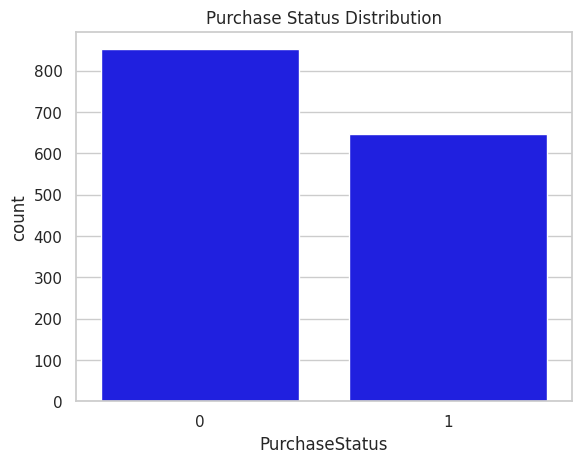

In [39]:
sns.set(style="whitegrid")

sns.countplot(x='PurchaseStatus', data=df, color="blue")
plt.title('Purchase Status Distribution')
plt.show()

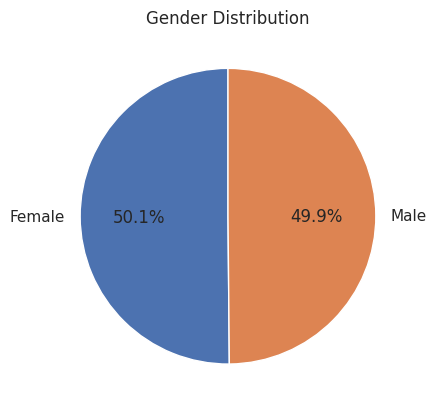

In [53]:
# Mapping gender values to labels without affecting the original DataFrame
gender_mapping = {0: 'Male', 1: 'Female'}
df_mapped = df_removed_duplicates.copy()
df_mapped['Gender'] = df_mapped['Gender'].map(gender_mapping)

# Generating the pie chart
gender_counts = df_mapped['Gender'].value_counts()  # Use the mapped DataFrame here
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Gender Distribution')
plt.show()




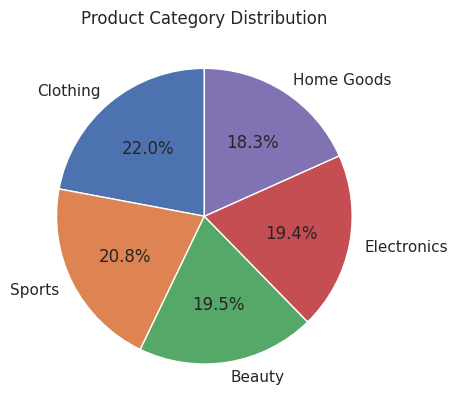

In [61]:
# Mapping product category values to their corresponding names
category_mapping = {0: 'Electronics', 1: 'Clothing', 2: 'Home Goods', 3: 'Beauty', 4: 'Sports'}
df_category_mapped = df_removed_duplicates.copy()
df_category_mapped['ProductCategory'] = df_category_mapped['ProductCategory'].map(category_mapping)

category_counts = df_category_mapped['ProductCategory'].value_counts()
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Product Category Distribution')
plt.show()


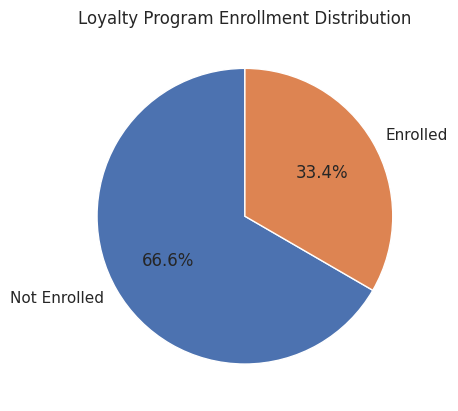

In [31]:
# Mapping loyalty program values without affecting the original DataFrame
loyalty_mapping = {0: 'Not Enrolled', 1: 'Enrolled'}
df_mapped = df_removed_duplicates.copy()  # Create a temporary copy
df_mapped['LoyaltyProgram'] = df_mapped['LoyaltyProgram'].map(loyalty_mapping)

# Generating the pie chart for loyalty program distribution
loyalty_counts = df_mapped['LoyaltyProgram'].value_counts()
plt.pie(loyalty_counts, labels=loyalty_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Loyalty Program Enrollment Distribution')
plt.show()


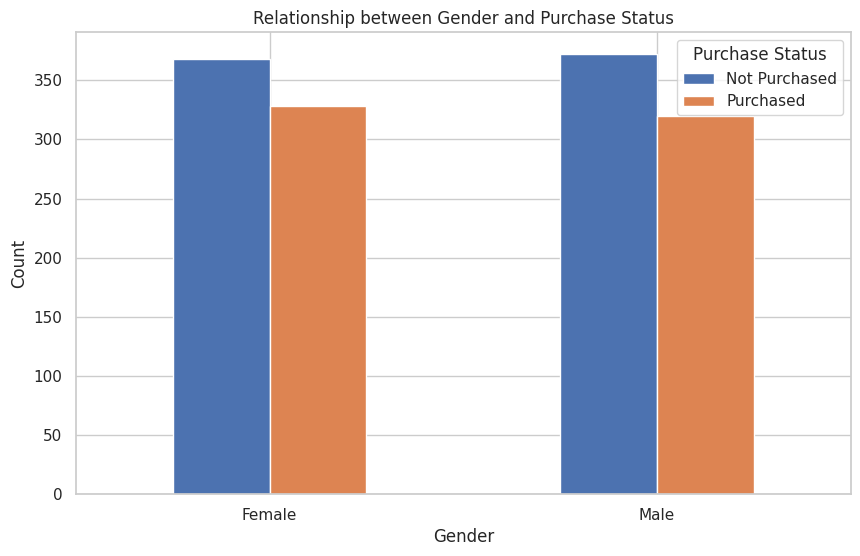

In [58]:
gender_mapping = {0: 'Male', 1: 'Female'}
df_temp = df_removed_duplicates.copy()
df_temp['Gender'] = df_temp['Gender'].map(gender_mapping)
gender_purchase_relation = df_temp.groupby(['Gender', 'PurchaseStatus'])['PurchaseStatus'].count().unstack()

gender_purchase_relation.plot(kind='bar', stacked=False, figsize=(10, 6))

plt.title('Relationship between Gender and Purchase Status')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Purchase Status', labels=['Not Purchased', 'Purchased'])
plt.show()

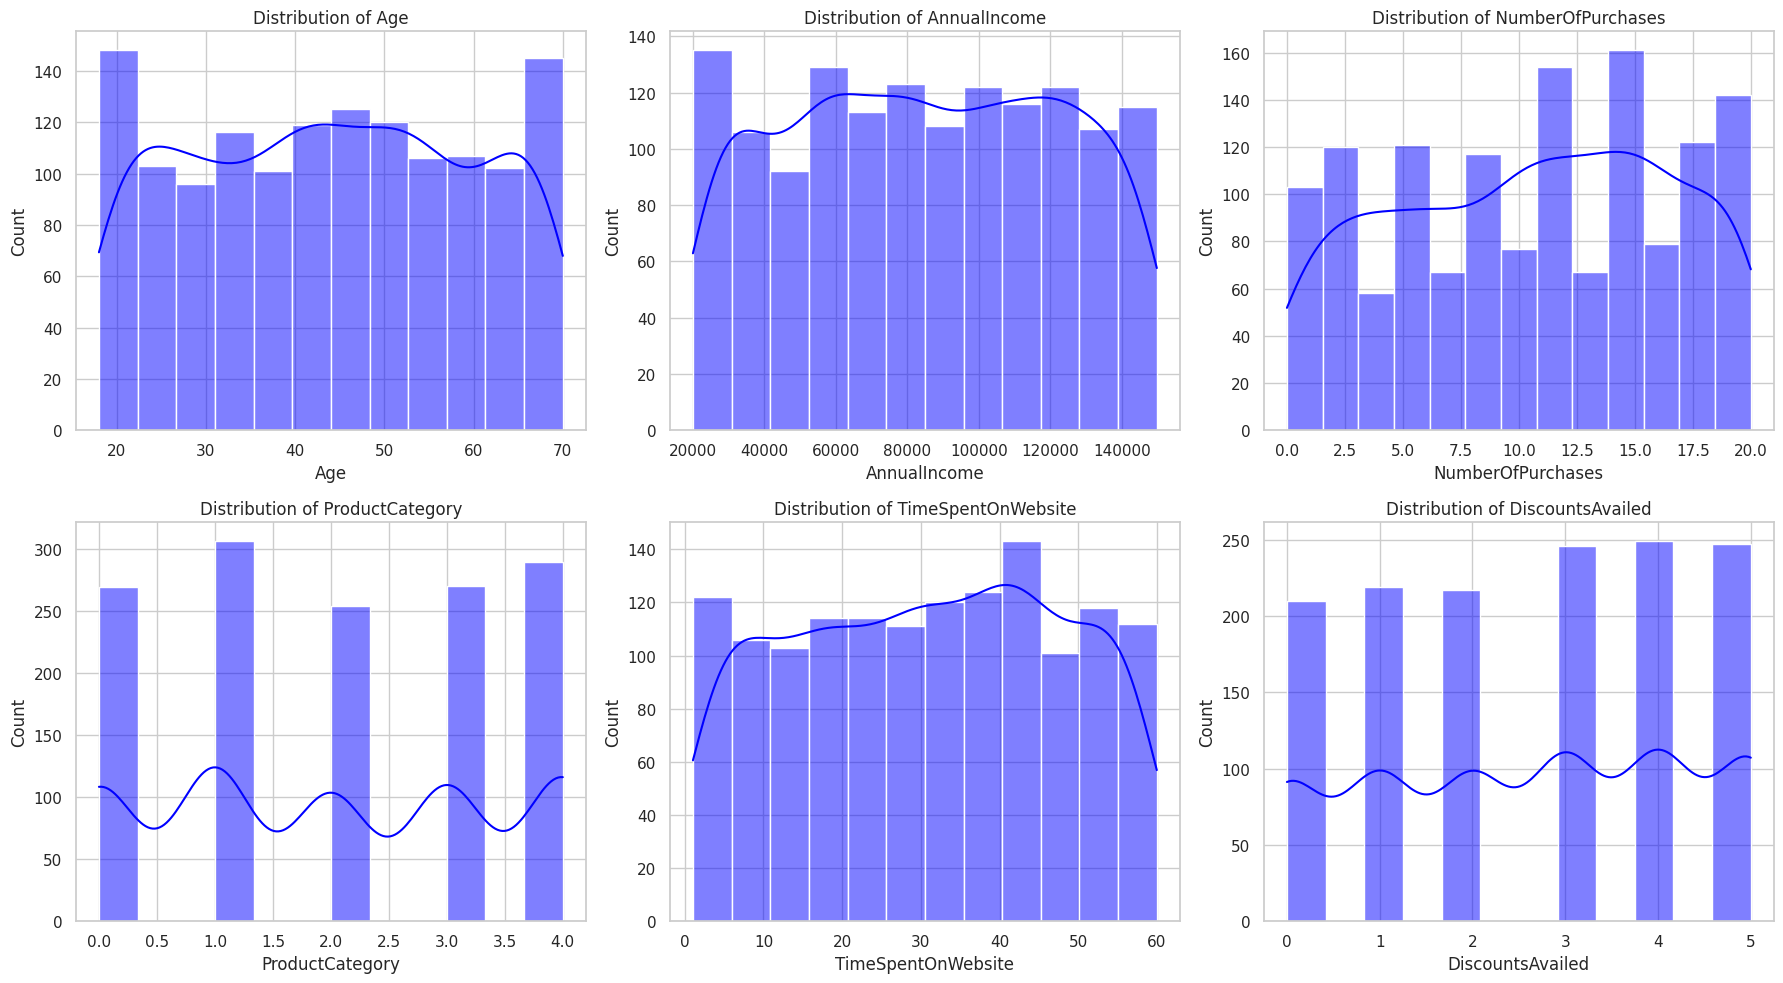

In [59]:
sns.set(style="whitegrid")

features_to_plot = ['Age', 'AnnualIncome','NumberOfPurchases', 'ProductCategory', 'TimeSpentOnWebsite', 'DiscountsAvailed']
num_features = len(features_to_plot)
num_rows = (num_features + 2) // 3
num_cols = min(num_features, 3)
fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, 5 * num_rows))
axes = axes.flatten()

for i, feature in enumerate(features_to_plot):
  sns.histplot(df_removed_duplicates[feature], kde=True, ax=axes[i], color="blue")
  axes[i].set_title(f"Distribution of {feature}")

plt.tight_layout()
plt.show()

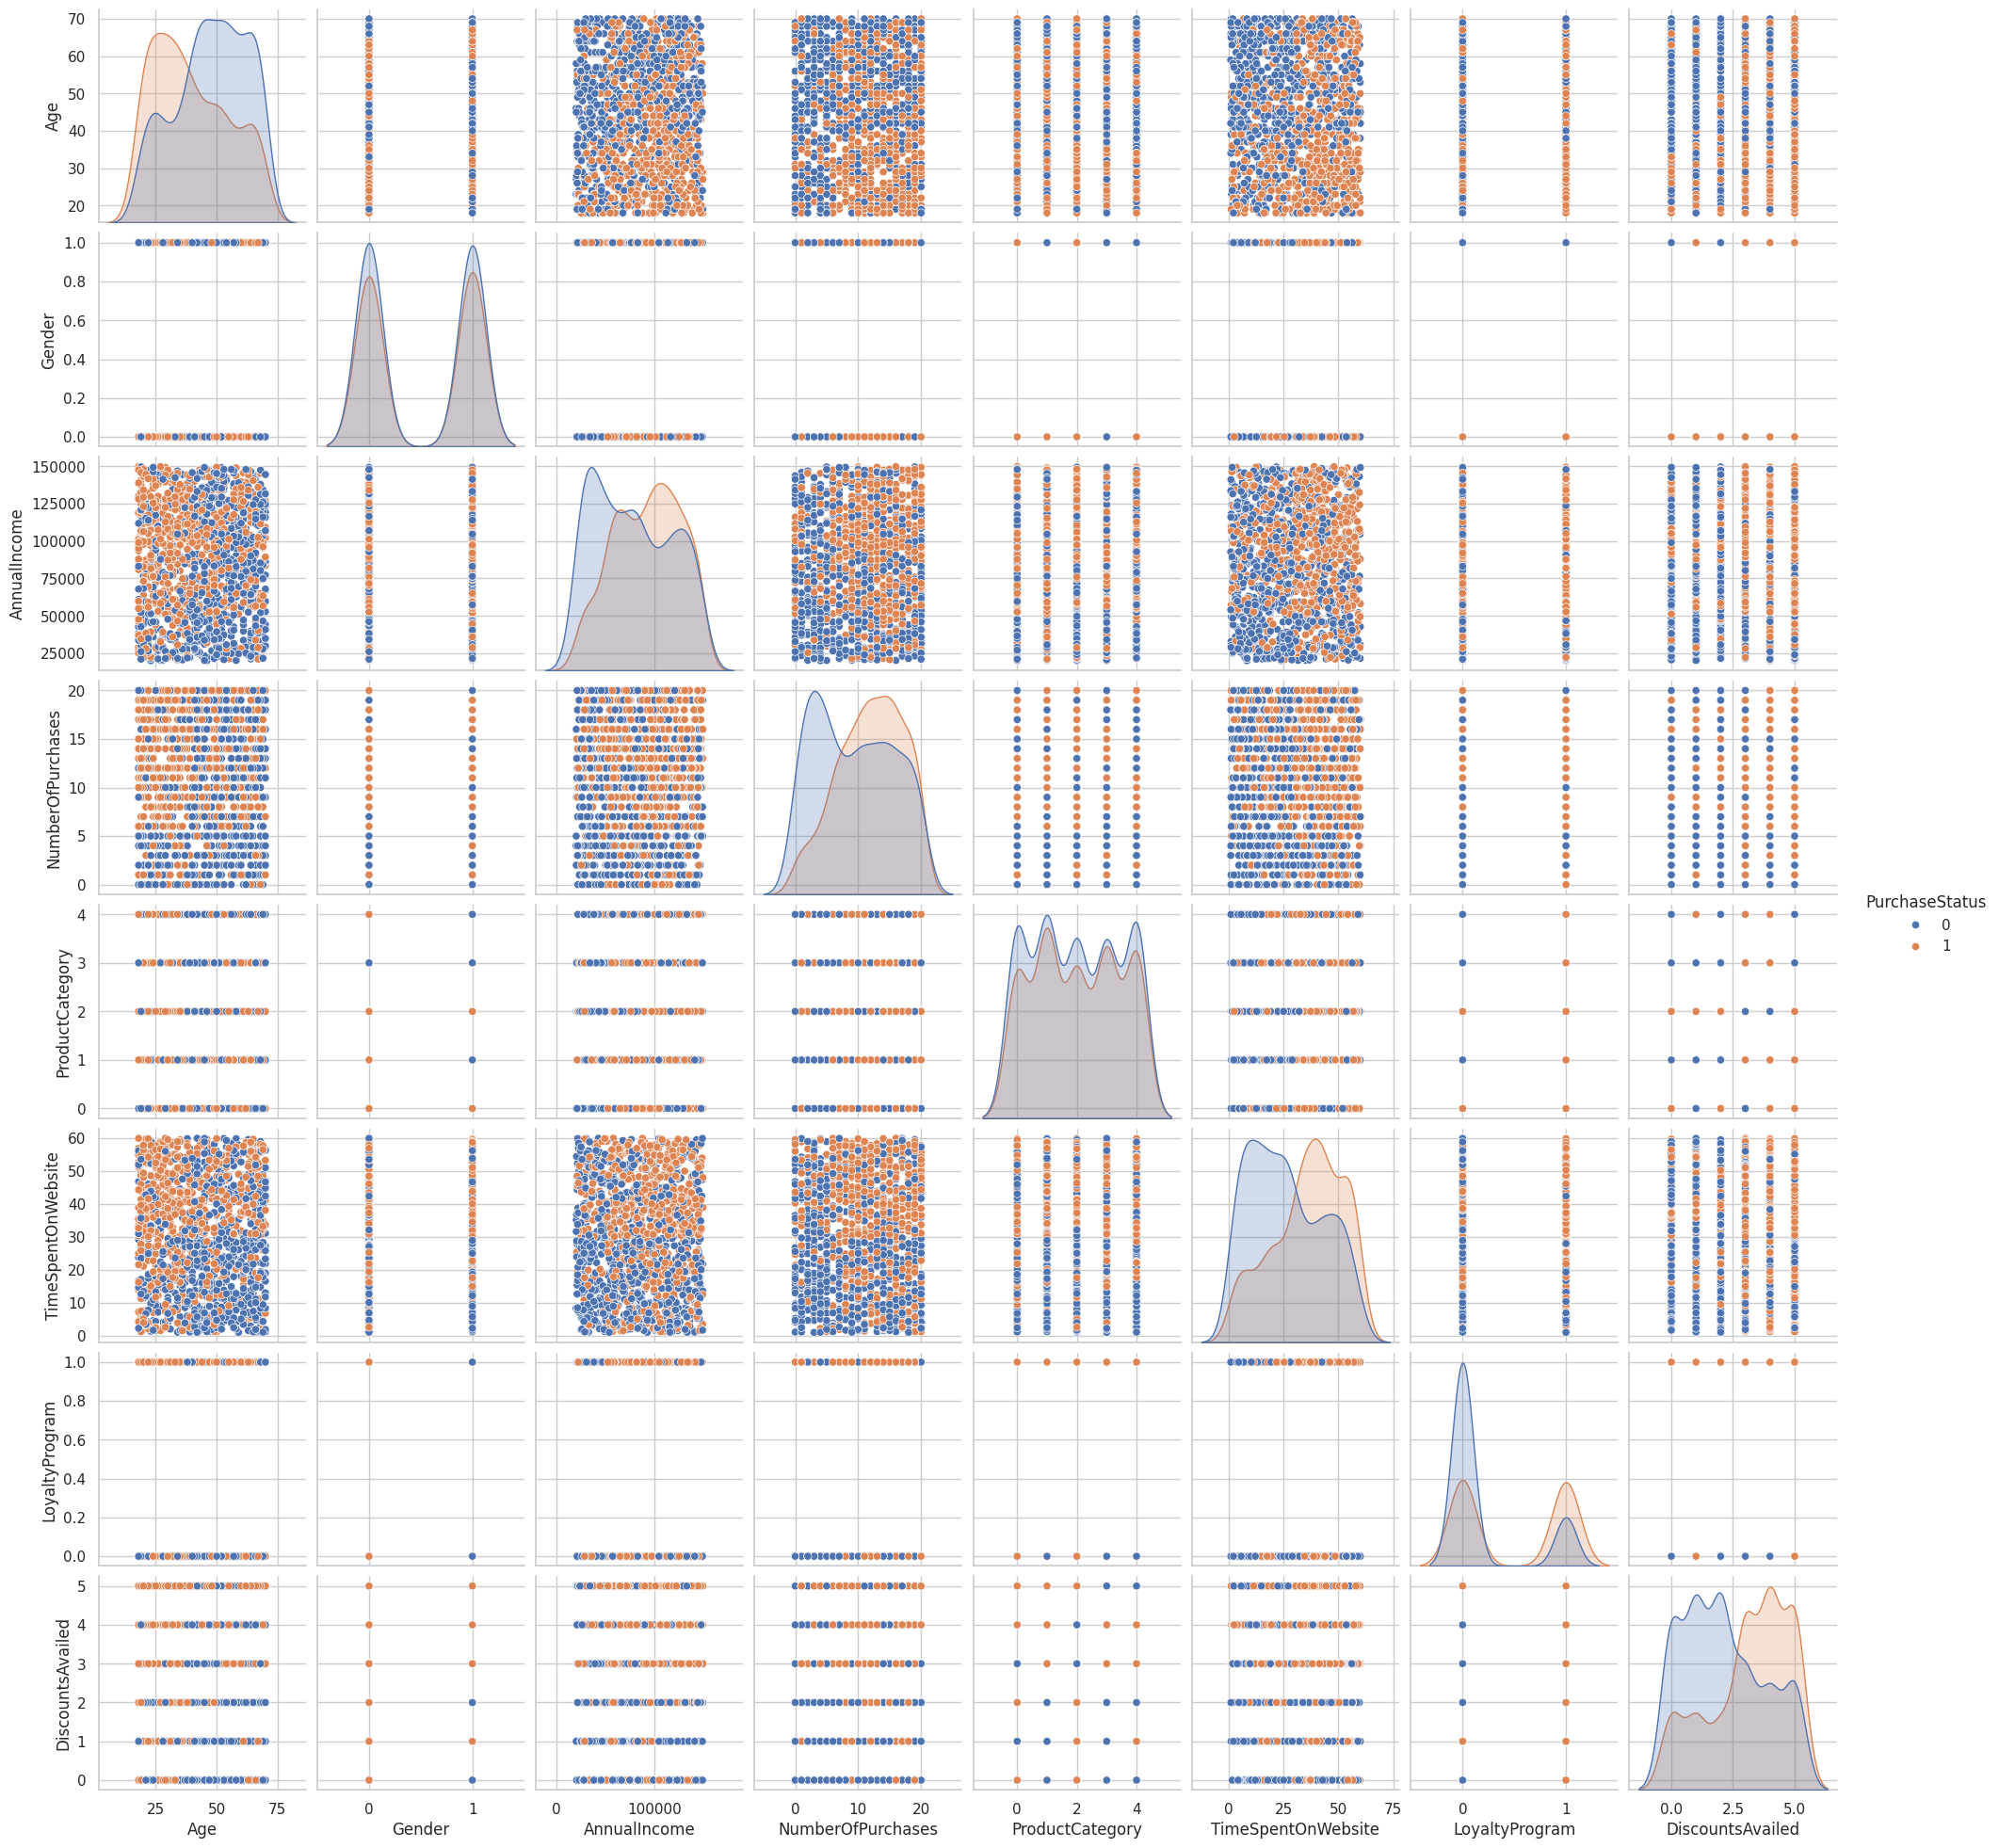

In [36]:
sns.pairplot(df_removed_duplicates, hue='PurchaseStatus')
plt.show()

Analyzing the relationship between features and target variable

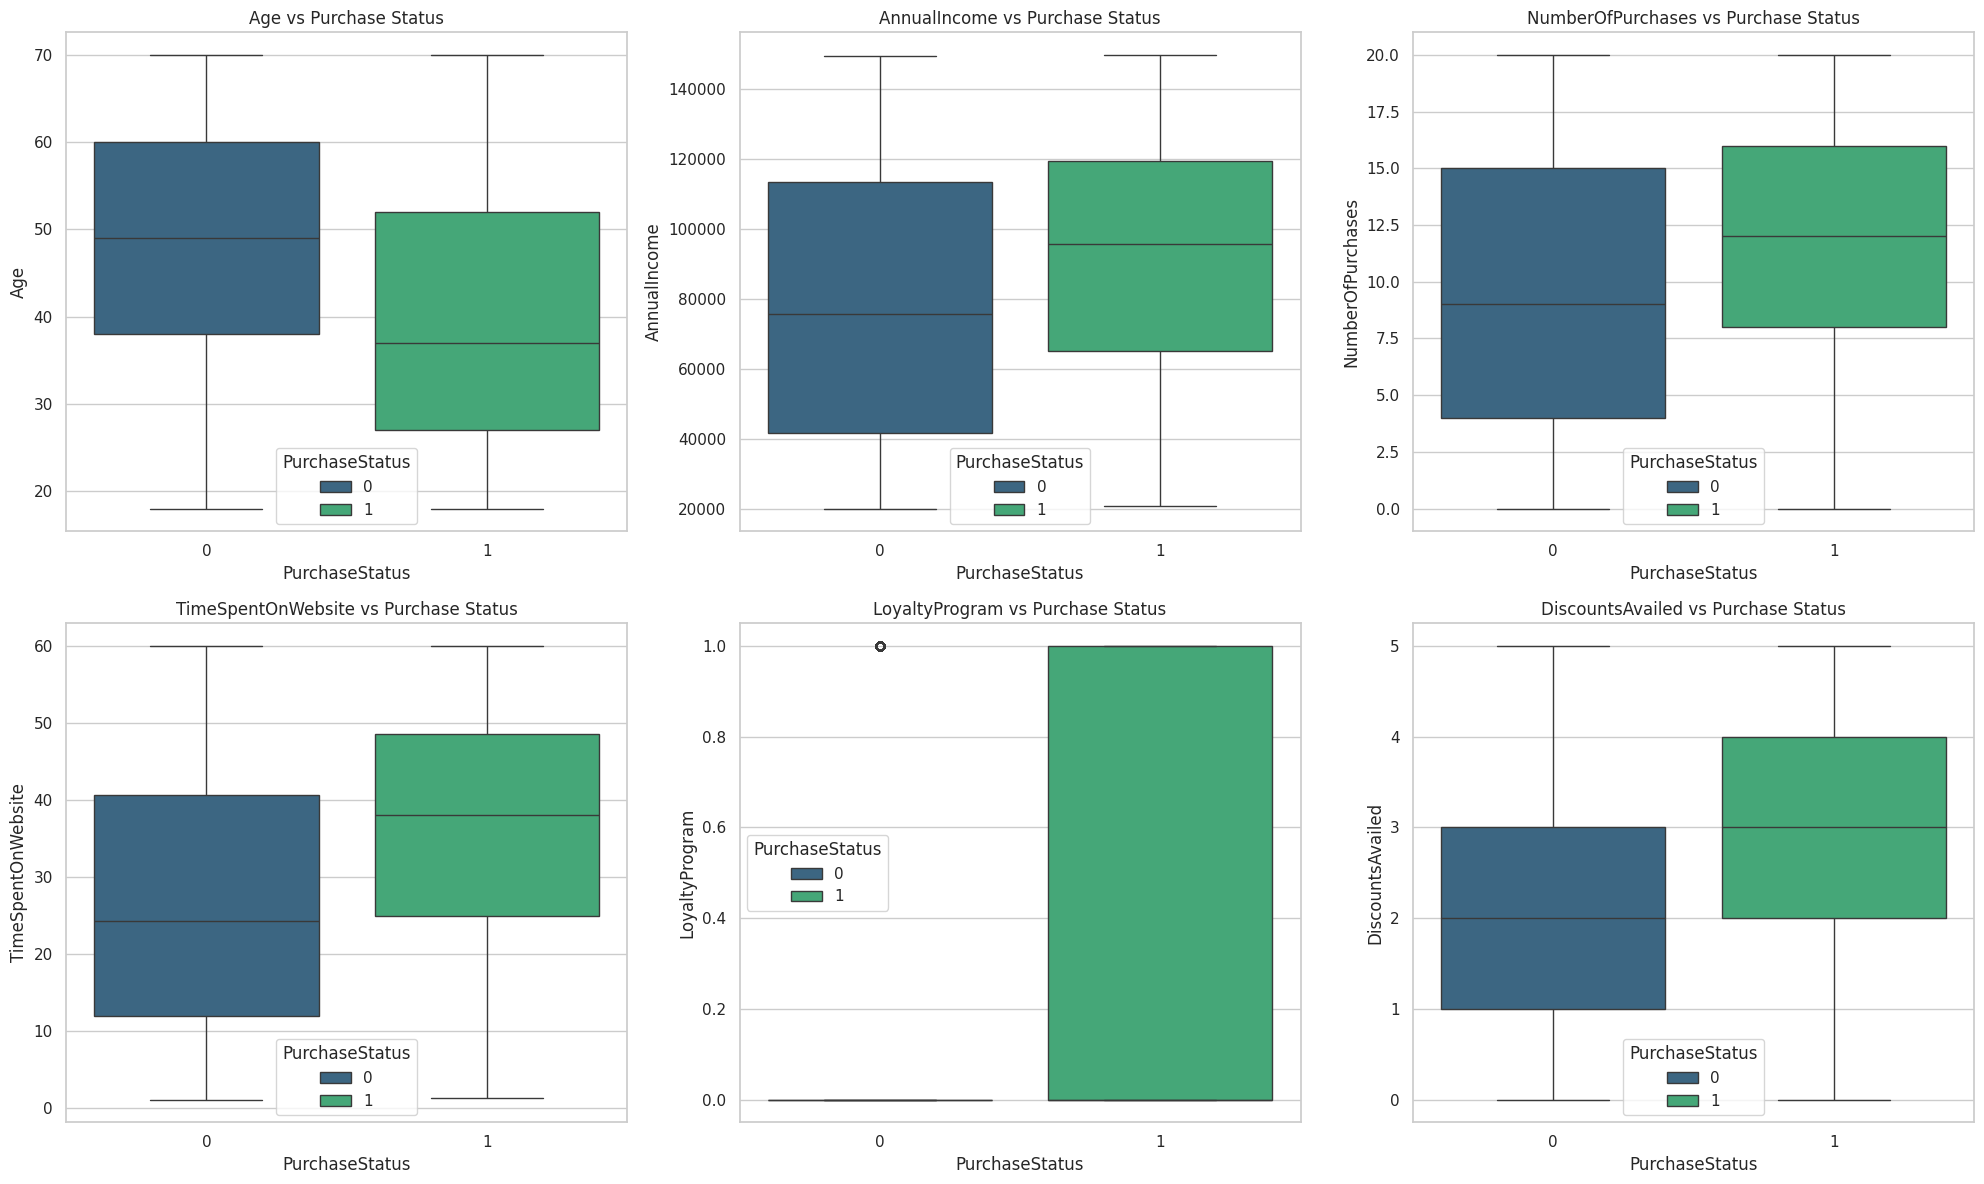

In [49]:
features_to_plot = ['Age', 'AnnualIncome', 'NumberOfPurchases', 'TimeSpentOnWebsite', 'LoyaltyProgram', 'DiscountsAvailed']

fig, axes = plt.subplots(2, 3, figsize=(20, 12))

for i, feature in enumerate(features_to_plot):
    row, col = divmod(i, 3)
    sns.boxplot(
        x="PurchaseStatus",
        y=feature,
        data=df_removed_duplicates,
        ax=axes[row, col],
        palette="viridis",
        hue="PurchaseStatus",
        dodge=False
    )
    axes[row, col].set_title(f"{feature} vs Purchase Status")

for i in range(len(features_to_plot), axes.size):
    axes.flatten()[i].set_visible(False)

plt.tight_layout()
plt.show()


Correlation Heatmap

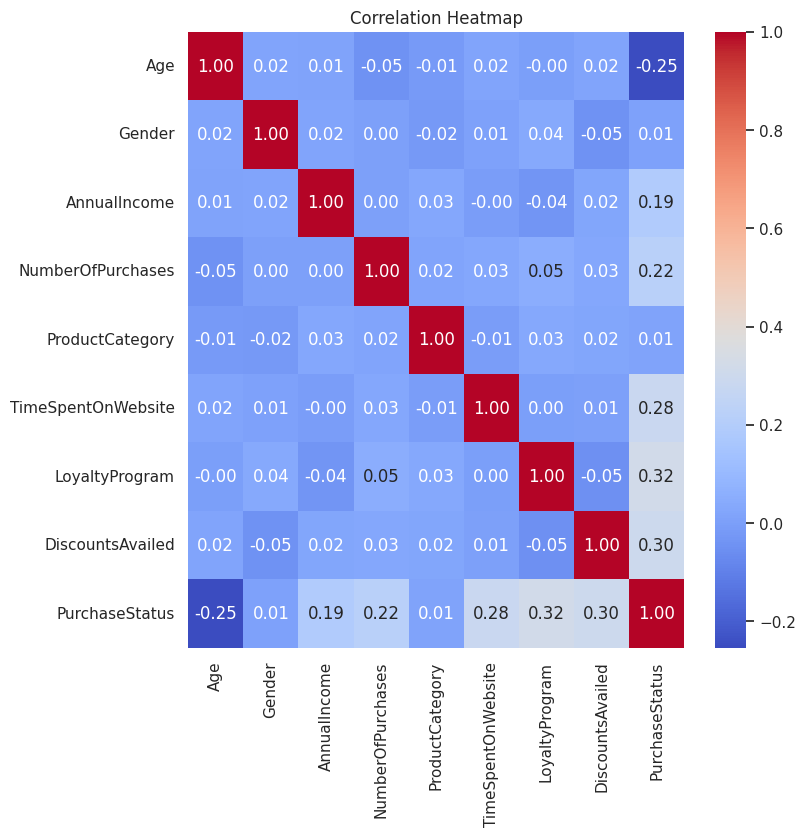

In [60]:
plt.figure(figsize=(8, 8))
correlation_matrix = df_removed_duplicates.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

Splitting the data


In [64]:
x = df_removed_duplicates.drop(columns=['PurchaseStatus'])
y = df_removed_duplicates['PurchaseStatus']

In [65]:
x.head()

,Age,Gender,AnnualIncome,NumberOfPurchases,ProductCategory,TimeSpentOnWebsite,LoyaltyProgram,DiscountsAvailed
0,40,1,66120.267939,8,0,30.568601,0,5
1,20,1,23579.773583,4,2,38.240097,0,5
2,27,1,127821.306432,11,2,31.633212,1,0
3,24,1,137798.623120,19,3,46.167059,0,4
4,31,1,99300.964220,19,1,19.823592,0,0


Feature Scaling

In [67]:
numeric_scalable_features =['Age', 'AnnualIncome', 'NumberOfPurchases', 'TimeSpentOnWebsite', 'DiscountsAvailed']
scaler = StandardScaler()
df_removed_duplicates[numeric_scalable_features] = scaler.fit_transform(df_removed_duplicates[numeric_scalable_features])

df_removed_duplicates.info(), df_removed_duplicates.head()

<class 'pandas.core.frame.DataFrame'>
Index: 1388 entries, 0 to 1499
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 1388 non-null   float64
 1   Gender              1388 non-null   int64  
 2   AnnualIncome        1388 non-null   float64
 3   NumberOfPurchases   1388 non-null   float64
 4   ProductCategory     1388 non-null   int64  
 5   TimeSpentOnWebsite  1388 non-null   float64
 6   LoyaltyProgram      1388 non-null   int64  
 7   DiscountsAvailed    1388 non-null   float64
 8   PurchaseStatus      1388 non-null   int64  
dtypes: float64(5), int64(4)
memory usage: 108.4 KB


<ipython-input-67-78b2bd17b522>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_removed_duplicates[numeric_scalable_features] = scaler.fit_transform(df_removed_duplicates[numeric_scalable_features])


(None,
         Age  Gender  AnnualIncome  NumberOfPurchases  ProductCategory  \
 0 -0.254456       1     -0.495070          -0.434443                0   
 1 -1.546283       1     -1.628648          -1.116191                2   
 2 -1.094144       1      1.149081           0.076869                2   
 3 -1.287918       1      1.414947           1.440365                3   
 4 -0.835778       1      0.389098           1.440365                1   
 
    TimeSpentOnWebsite  LoyaltyProgram  DiscountsAvailed  PurchaseStatus  
 0           -0.010544               0          1.406691               1  
 1            0.441498               0          1.406691               0  
 2            0.052188               1         -1.535574               1  
 3            0.908594               0          0.818238               1  
 4           -0.643694               0         -1.535574               1  )

Splitting the data into training and test data

In [69]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

In [70]:
model = DecisionTreeClassifier(criterion="gini", max_depth=3, random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [71]:
y_pred = model.predict(X_test)

In [72]:
accuracy = accuracy_score(y_test , y_pred)
print('Accuracy:' , accuracy)

Accuracy: 0.7769784172661871


In [76]:
model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [77]:
y_pred = model.predict(X_test)

In [78]:
accuracy = accuracy_score(y_test , y_pred)
print('Accuracy:' , accuracy)

Accuracy: 0.8309352517985612


In [73]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [74]:
y_pred = model.predict(X_test)

In [75]:
accuracy = accuracy_score(y_test , y_pred)
print('Accuracy:' , accuracy)

Accuracy: 0.9172661870503597
